# [Lab Session 3](fourier.ipynb)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


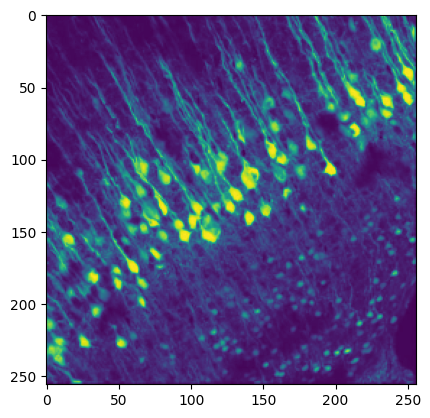

In [3]:
cell_img = plt.imread('data/cells.png')

cell_img = resize(cell_img, (256, 256))

plt.imshow(cell_img)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [4]:
cell_ft = np.fft.fft2(cell_img)

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [5]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

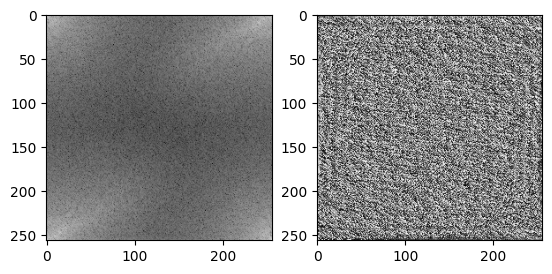

In [6]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


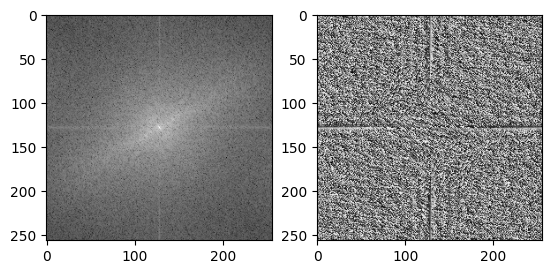

In [7]:
cell_shift = np.fft.fftshift(cell_ft)

amplitude = np.abs(cell_shift)
phase = np.angle(cell_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


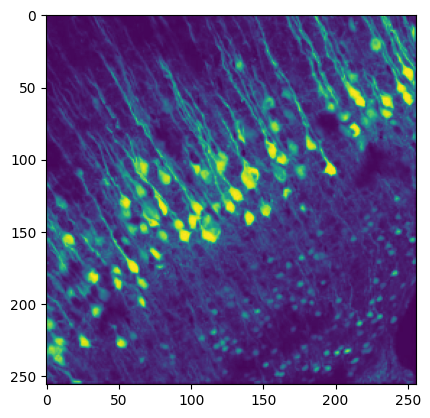

In [8]:
cell_restore = np.fft.ifft2(cell_ft)

plt.imshow(cell_restore.real)

---


**[Task 2 (a).]()** Load the brain CT image.


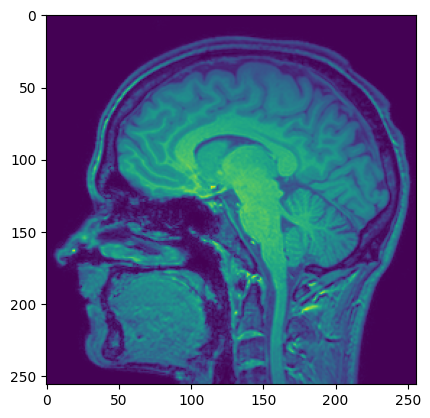

In [9]:
brain_ct = plt.imread('data/brain_ct.png')

plt.imshow(brain_ct)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


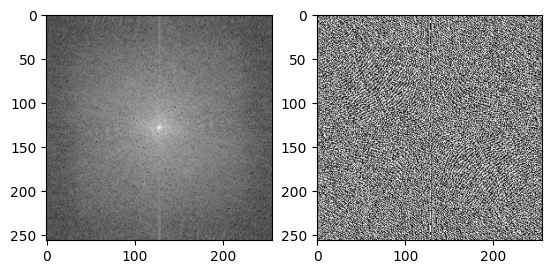

In [10]:
brain_ft = np.fft.fft2(brain_ct)

brain_shift = np.fft.fftshift(brain_ft)

amplitude = np.abs(brain_shift)
phase = np.angle(brain_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

In [11]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


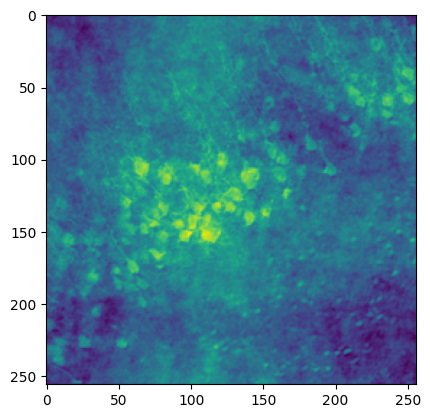

In [12]:
merge = to_complex_array(np.abs(brain_ft), np.angle(cell_ft))

merge_restore = np.fft.ifft2(merge)

plt.imshow(merge_restore.real)

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


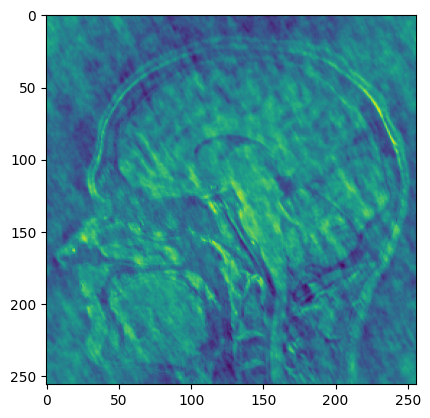

In [13]:
merge = to_complex_array(np.abs(cell_ft), np.angle(brain_ft))

merge_restore = np.fft.ifft2(merge)

plt.imshow(merge_restore.real)

Conclude: Phase contains more information

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [14]:
filter_window_size = 50

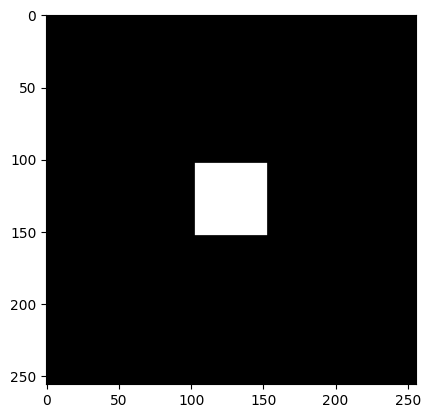

In [15]:
image_shape = (256, 256)

mask = np.zeros(image_shape)


center = image_shape[0] // 2


#Define the rectangle boundaries

start = center - filter_window_size // 2

end = center + filter_window_size // 2

#Insert a rectangle of ones into the mask

low_pass = mask
low_pass[start:end, start:end] = 1

plt.imshow(low_pass, cmap = "gray")


**[Task 3 (b).]()** Create a highpass filter maks.


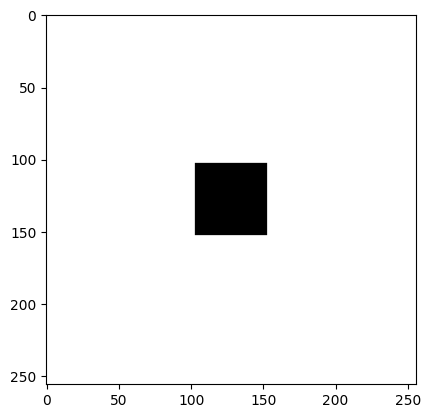

In [16]:
high_pass = 1 - low_pass

plt.imshow(high_pass, cmap = "gray")


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_980/3314714380.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude * low_pass), 'gray')
/tmp/ipykernel_980/3314714380.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude * high_pass), 'gray')


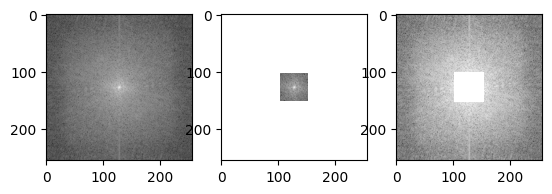

In [17]:
amplitude = np.abs(brain_shift)
phase = np.angle(brain_shift)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 3, 2)
plt.imshow(np.log(amplitude * low_pass), 'gray')
plt.subplot(1, 3, 3)
plt.imshow(np.log(amplitude * high_pass), 'gray')

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


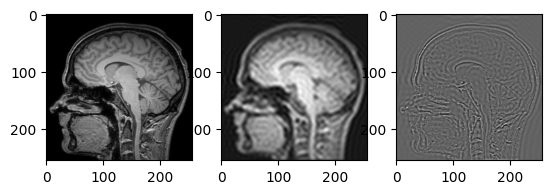

In [18]:
low_pass_restore = np.fft.ifft2(np.fft.ifftshift(to_complex_array(np.abs(amplitude * low_pass), np.angle(brain_shift))))
high_pass_restore = np.fft.ifft2(np.fft.ifftshift(to_complex_array(np.abs(amplitude * high_pass), np.angle(brain_shift))))

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(brain_ct, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(low_pass_restore.real, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(high_pass_restore.real, 'gray')

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [48]:
def dft(img) :

    dft = np.zeros(img.shape, dtype=complex)

    M, N = img.shape
    for u in range(M) :
        for v in range(N) :
            for x in range(M) :
                for y in range(N) :
                    dft[u, v] += img[x, y] * np.exp(-2j*np.pi*(u*x/M + v*y/N))
    dft = (1/(M*N)) * dft
    return dft

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [33]:
def idft(img) :

    idft = np.zeros(img.shape, dtype=complex)

    M, N = img.shape
    for u in range(M) :
        for v in range(N) :
            for x in range(M) :
                for y in range(N) :
                    idft[u, v] += img[x, y] * np.exp(2j*np.pi*(u*x/M + v*y/N))

    return idft

Due to high computational costs, we need to resize the image.


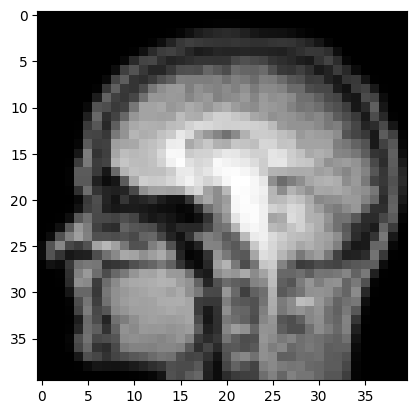

In [42]:
test_img = resize(brain_ct, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


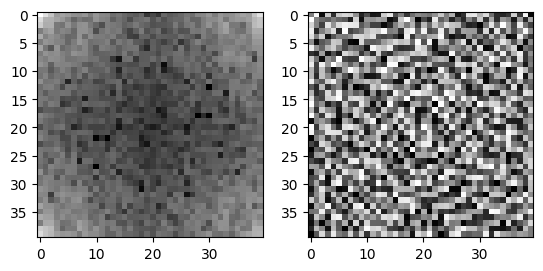

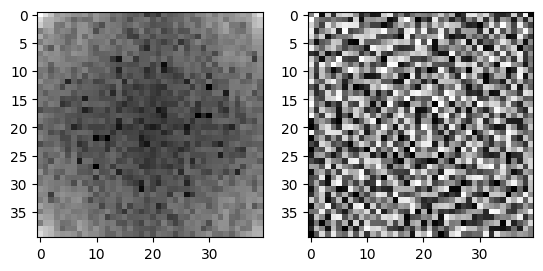

In [ ]:
brain_dft = dft(test_img)

amplitude = np.abs(brain_dft)
phase = np.angle(brain_dft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

"""
brain_fft = np.fft.fft2(test_img, norm='forward')

amplitude = np.abs(brain_fft)
phase = np.angle(brain_fft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')
"""

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


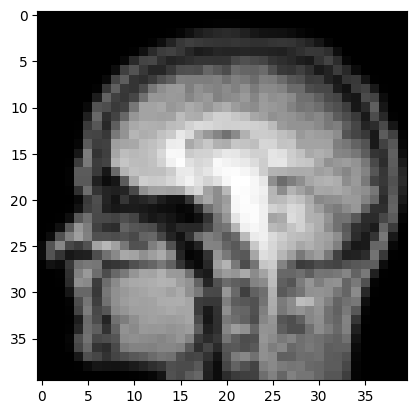

In [46]:
brain_restore = idft(brain_dft)

plt.imshow(brain_restore.real, 'gray')

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [37]:
brain_fft = np.fft.fft2(test_img, norm='forward')
brain_dft = dft(test_img)

np.allclose(brain_fft, brain_dft)

False

**[Task 4 (f).]()** Round the arrays and compare them again.


In [67]:
print(np.mean(np.abs(brain_dft - brain_fft)))

fft_round = np.round(brain_fft, 12)
dft_round = np.round(brain_dft, 12)

(dft_round == fft_round).all()

7.541097048883874e-17


True

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [69]:
%timeit brain_dft = dft(test_img)

%timeit brain_fft = np.fft.fft2(test_img, norm='forward')


4.89 s ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
31.8 μs ± 4.13 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
